### Import the data and first look

In [145]:
import seaborn as sns
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import matplotlib.pylab as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
sns.set_style("whitegrid")

In [146]:
df=pd.read_csv("train.csv")

In [147]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [148]:
df.drop("Id",axis=1,inplace=True)

In [149]:
df.shape

(1460, 80)

In [150]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [151]:
nan=df.isna().sum().to_frame(name="nan").query("nan != 0").sort_values("nan",ascending=False)
nan

,nan
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


In [152]:
df[nan.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageType    1379 non-null   object 
 7   GarageYrBlt   1379 non-null   float64
 8   GarageFinish  1379 non-null   object 
 9   GarageQual    1379 non-null   object 
 10  GarageCond    1379 non-null   object 
 11  BsmtExposure  1422 non-null   object 
 12  BsmtFinType2  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

### from first look:
- the first 6 columns in ( nan ) will be deleted for a lot of nan values
- the other columns are missed beacouse " i guess " there is no mean of filling the data,for example, the 'GarageType' were missed as they had no garage. the itiuation came form the other columns has the same missig values under garage category

In [153]:
#df_t is a copy of the original data with changes
deleted_cols=nan.index[0:6]
df_t=df.drop(deleted_cols,axis=1)

In [154]:
df_t.dropna(subset=["Electrical"],axis=0,inplace=True)

In [155]:
# the columns after the deleting the ( NAN columns )
df_t.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

### analyze the numerical columns

In [156]:
categorical = df_t.select_dtypes(include = ["object"]).columns
numerical= df_t.select_dtypes(exclude="object").columns

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'HalfBa

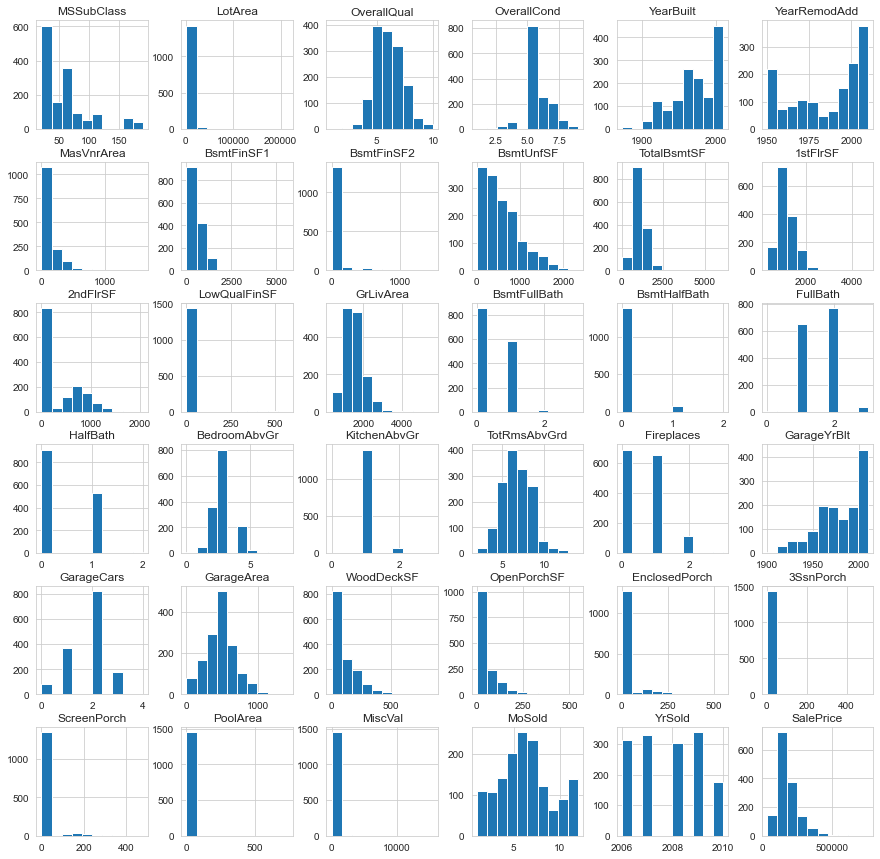

In [157]:
df_t[numerical].hist(figsize=(15,15))

- to make good model ( we select the features with distribuation near to normal )
- i will set the high skew value (-1,1) that is considerd as approximately symetric

In [238]:
# get the skew value
skews=df_t[numerical].skew()
# ge tle low values
skews=skews[abs(skews)<.5]

In [239]:
skews

OverallQual     0.215719
FullBath        0.037860
BedroomAbvGr    0.212058
GarageCars     -0.341845
GarageArea      0.179266
MoSold          0.211106
YrSold          0.096521
dtype: float64

## let visualize the distrubution again the scatter plot Vs the target variable

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hi

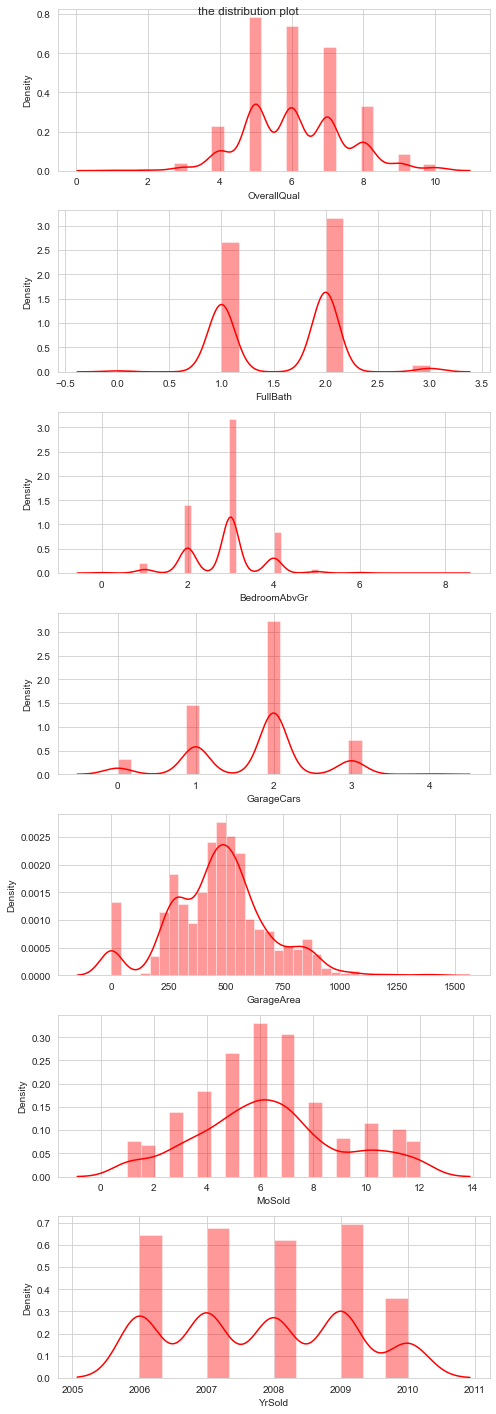

In [240]:
# plot the dist of the low skewd columns
f,axes=plt.subplots(nrows=len(skews.index),ncols=1,figsize=(7,20))
f.suptitle("the distribution plot")
for i ,value in enumerate(skews.index):
    sns.distplot(df[value],color="red",ax=axes[i])
plt.tight_layout()


c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

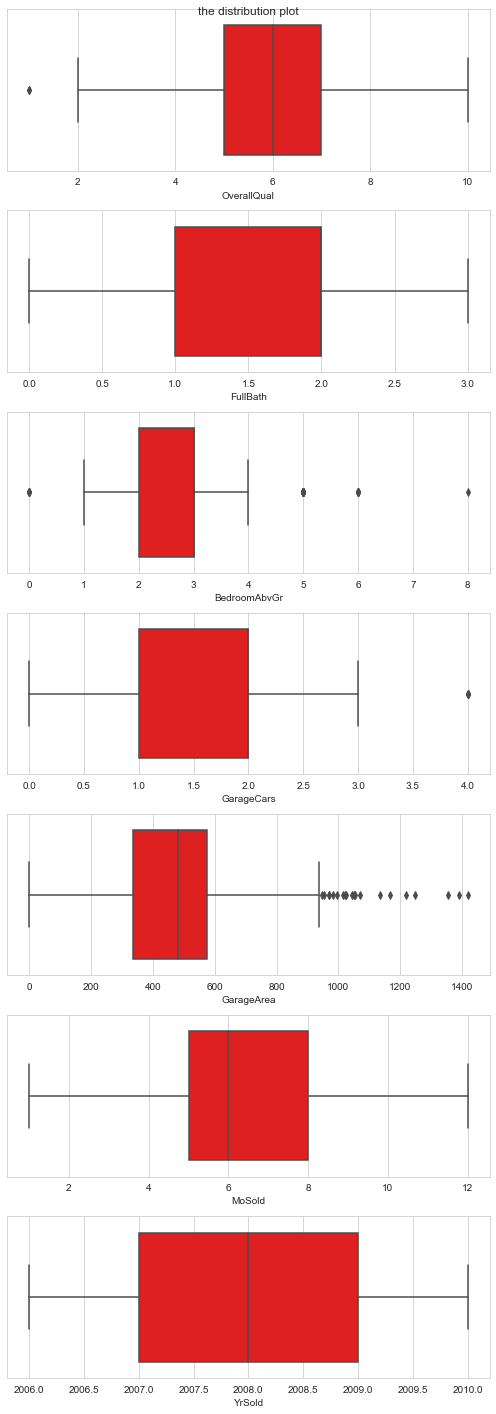

In [241]:
# plot the box of the low skewd columns
f,axes=plt.subplots(nrows=len(skews.index),ncols=1,figsize=(7,20))
f.suptitle("the distribution plot")
for i ,value in enumerate(skews.index):
    sns.boxplot(df[value],color="red",ax=axes[i])
plt.tight_layout()


In [242]:
## plot the correlation
nums=pd.Series([*skews.index,"SalePrice"])
nums

0     OverallQual
1        FullBath
2    BedroomAbvGr
3      GarageCars
4      GarageArea
5          MoSold
6          YrSold
7       SalePrice
dtype: object

<AxesSubplot:>

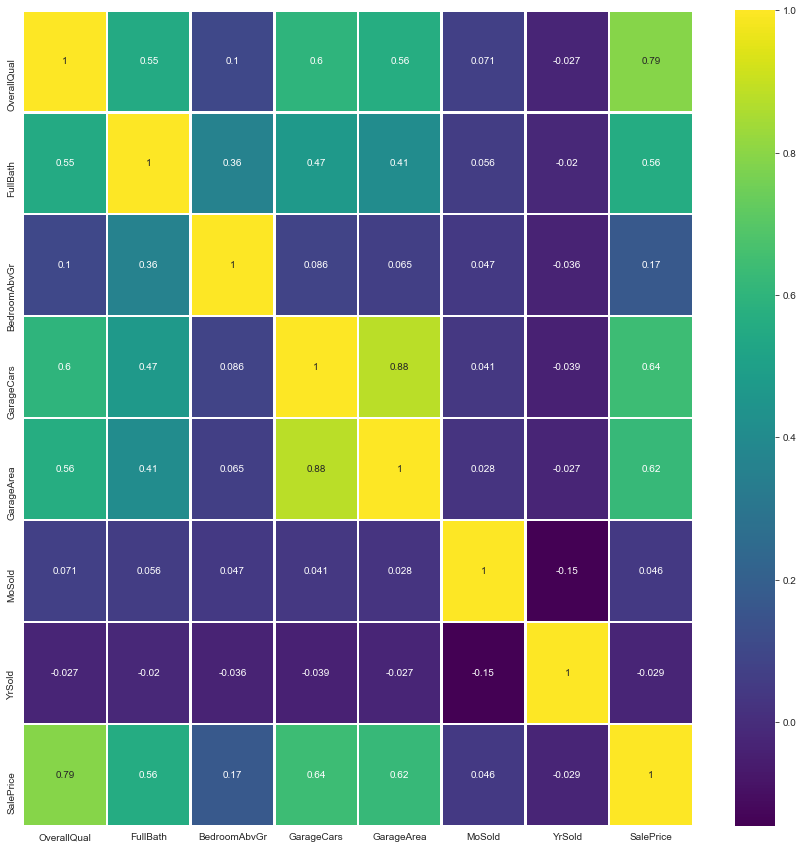

In [243]:
plt.figure(figsize=(15,15))
sns.heatmap(df[nums].corr(),annot=True,cmap="viridis",linewidth=1.5,linecolor="#fff")

## from the heatmap:-
- [ GarageArea,GarageCars] have high collinear relations so i choose ( GarageCars that is highly collirated with tha target variable )
- with the same logic i will drop:
  - BedroomAbvGr
  - 2ndFlrsF
  - YearRemodAdd
  - GarageArea
  - GarageYrBilt


In [260]:
final_nums= set(nums)-set(["GarageArea","SalePrice"])

In [261]:
final_nums

{'BedroomAbvGr', 'FullBath', 'GarageCars', 'MoSold', 'OverallQual', 'YrSold'}

## analysing the categorical features

In [262]:
df_t[categorical].isna().sum().sort_values(ascending=False).head(15)

GarageCond      81
GarageQual      81
GarageFinish    81
GarageType      81
BsmtExposure    38
BsmtFinType2    38
BsmtCond        37
BsmtFinType1    37
BsmtQual        37
MasVnrType       8
HeatingQC        0
Heating          0
MSZoning         0
CentralAir       0
Electrical       0
dtype: int64

- now what will i do with missing data in cat_features.
- do i impute them with the most frequent, or fill them with e.g ['no'] expressing that they don't have 

In [310]:
categorical_features = df_t.select_dtypes(include="object").columns
integer_features = df_t.select_dtypes(exclude="object").drop("SalePrice",axis=1).columns

In [321]:
df_t[categorical_features].fillna("no",inplace=True)
x=pd.concat([df_t[categorical_features],df_t[integer_features]],axis=1)
y=df_t["SalePrice"]

In [322]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.compose import ColumnTransformer

In [323]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [331]:
numerical_transformer = SimpleImputer(strategy='median')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, integer_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [337]:
m=XGBRegressor(n_estimators=500,n_jobs=4,random_state=0,learning_rate=.05)

In [338]:
model=Pipeline(steps=[
    ("impute",preprocessor),
    ("model",m)
])

In [339]:
model.fit(x_train,y_train)

Pipeline(steps=[('impute',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', '...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.05,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=500, n_jobs=4, num_parallel_tree=1,
                              random_state=0, reg_alph

In [340]:
y_pred=model.predict(x_test)

In [341]:
np.sqrt(mean_squared_error(y_pred,y_test))

26420.2963816753